In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
import ternary


In [2]:
absolute_path = "C:/Users/maler/Google Drive/Lavoro/Zuse Institute/Code/experiments_results"
experiment_folder = absolute_path + "/base"

In [3]:
metrics_results = utils.load_metrics(experiment_folder)

In [4]:
agent_metric = metrics_results['AgentMetric']
n_agents = agent_metric.shape[1]
n_options = agent_metric.shape[2]
R = np.max(agent_metric)

In [5]:
mapped_options = agent_metric/(n_options*R) + 1/n_options

# This is used to linearize the plots by sampling on every x time_steps
x = 100
mapped_options = mapped_options[:25000:x, :, :]

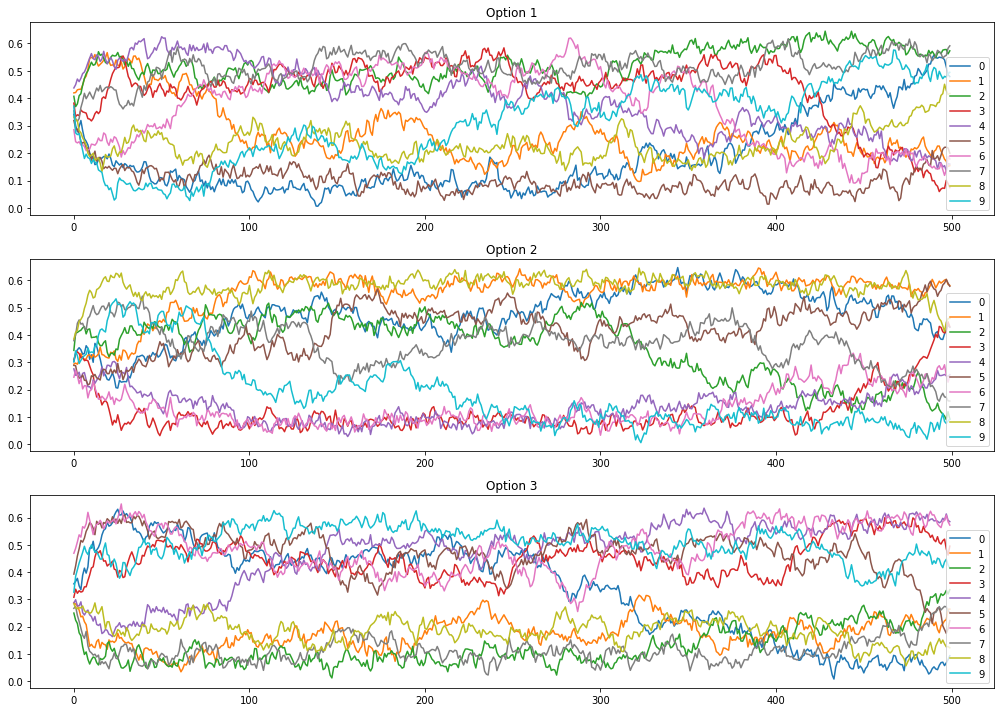

In [6]:
plt.figure(figsize=(14, 10))
for agent in range(n_agents):
    for option in range(n_options):
        plt.subplot(3, 1, option+1)
        plt.plot(mapped_options[:, agent, option], label=str(agent))

plt.subplot(3, 1, 1)
plt.title('Option 1')
plt.legend()
plt.subplot(3, 1, 2)
plt.title('Option 2')
plt.legend()
plt.subplot(3, 1, 3)
plt.title('Option 3')
plt.legend()
plt.tight_layout()
plt.show()

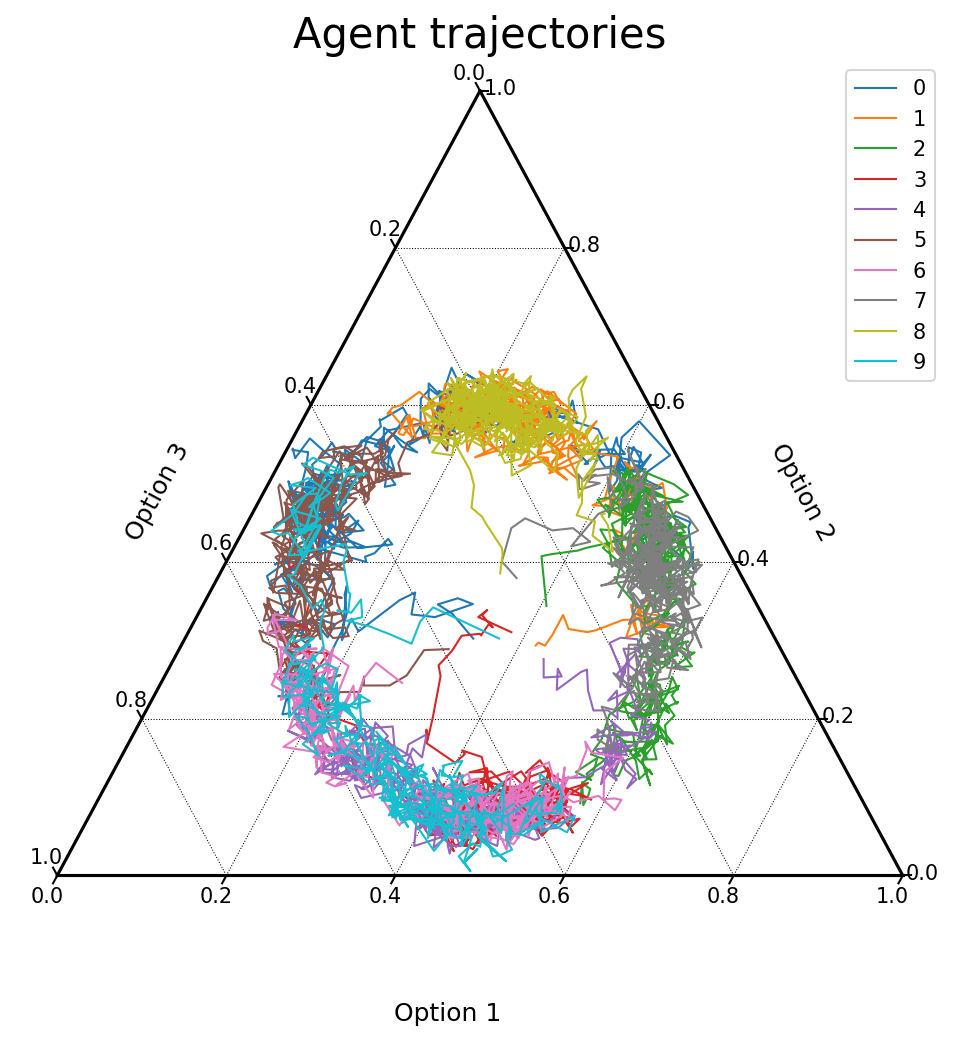

In [7]:
figure, ax = plt.subplots(figsize=(8, 8), dpi=150)
figure, tax = ternary.figure(ax=ax, scale=1.0)
tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax.set_title("Agent trajectories", fontsize=20)
fontsize = 12
offset = 0.14
tax.left_axis_label("Option 3", fontsize=fontsize, offset=offset)
tax.right_axis_label("Option 2", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Option 1", fontsize=fontsize, offset=offset)
for agent in range(n_agents):
    tax.plot(mapped_options[:, agent, :], linewidth=1.0, label=str(agent))
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f")
plt.axis('off')
tax.legend()
tax.show()